### Se importan las librerias

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import search
import warnings
warnings.filterwarnings("ignore")

### Estaciones de Carga de Combustible Electrico y Alternativo

In [106]:
df_eafcs = pd.read_csv('sources/Electric and Alternative Fuel Charging Stations.csv')

Se muestran los primeros registros

In [107]:
df_eafcs.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


Se eliminan las colimnas no necesarias

In [108]:
df_eafcs_col_eli = ['Intersection Directions', 'ZIP', 'Plus4','Restricted Access',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status','EV On-Site Renewable Source',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country','LNG Vehicle Class',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num',
       'CNG On-Site Renewable Source', 'CNG Total Compression Capacity',
       'CNG Storage Capacity', 'LNG On-Site Renewable Source',
       'E85 Other Ethanol Blends', 'EV Pricing', 'EV Pricing (French)',
       'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards',
       'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class']

df_eafcs.drop(df_eafcs_col_eli, axis=1, inplace=True)

Se muestra el dataframe

In [109]:
df_eafcs.head()

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,32.367916,-86.267021
1,CNG,PS Energy - Atlanta,340 Whitehall St,Atlanta,GA,33.745843,-84.398837
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,33.821911,-84.367461
3,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,33.760256,-84.543822
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,35.362213,-94.375338


Se filtra el dataframe para estado de Nueva York y ciudades de Manhattan, Brooklyn, Bronx, Queens, Staten Island

In [110]:
df_eafcs = df_eafcs[(df_eafcs['State'] == 'NY') & (df_eafcs['City'].isin(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']))]

Se muestra el dataframe

In [111]:
df_eafcs.head()

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude
7,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,40.718037,-73.932309
8,CNG,Canarsie - National Grid,8424 Ditmas Ave,Brooklyn,NY,40.645540,-73.918344
11,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,40.844188,-73.861572
13,CNG,Con Edison - College Point Service Center,124-15 31st Ave,Queens,NY,40.769623,-73.843069
1500,CNG,Bronx Zoo,2300 Southern Blvd,Bronx,NY,40.850018,-73.878128


Se muestra la informacion del dataframe

In [112]:
df_eafcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 7 to 70288
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fuel Type Code  200 non-null    object 
 1   Station Name    200 non-null    object 
 2   Street Address  200 non-null    object 
 3   City            200 non-null    object 
 4   State           200 non-null    object 
 5   Latitude        200 non-null    float64
 6   Longitude       200 non-null    float64
dtypes: float64(2), object(5)
memory usage: 12.5+ KB


Buscan duplicados

In [113]:
df_eafcs_dup = df_eafcs[df_eafcs.duplicated()]
df_eafcs_dup

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude
3422,ELEC,Bay Ridge Nissan,6501 5th Ave,Brooklyn,NY,40.636324,-74.019228
3424,ELEC,Kings Nissan,2758 Coney Island Ave,Brooklyn,NY,40.589167,-73.960707


In [114]:
df_eafcs[(df_eafcs['Station Name'] == 'Bay Ridge Nissan')]

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude
3421,ELEC,Bay Ridge Nissan,6501 5th Ave,Brooklyn,NY,40.636324,-74.019228
3422,ELEC,Bay Ridge Nissan,6501 5th Ave,Brooklyn,NY,40.636324,-74.019228


Eliminación de Duplicados

In [115]:
df_eafcs = df_eafcs.drop_duplicates(subset=['Station Name'], keep='last')

Se buscan duplicados para verificar

In [116]:
df_eafcs_dup = df_eafcs[df_eafcs.duplicated()]
df_eafcs_dup

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude


Seteo el indice y muestro el dataframe

In [117]:
# Seteo el indice
df_eafcs.reset_index(drop=True, inplace=True)

In [118]:
df_eafcs.head(15)

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude
0,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,40.718037,-73.932309
1,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,40.844188,-73.861572
2,CNG,Con Edison - College Point Service Center,124-15 31st Ave,Queens,NY,40.769623,-73.843069
3,CNG,Bronx Zoo,2300 Southern Blvd,Bronx,NY,40.850018,-73.878128
4,CNG,Trillium - MTA New York City Transit - West Fa...,1100 E 177th St,Bronx,NY,40.838672,-73.877566
5,CNG,Trillium - MTA - Spring Creek,12755 Flatlands Ave,Brooklyn,NY,40.661038,-73.864438
6,CNG,Trillium - MTA New York City Transit - Jackie ...,871 5th Ave,Brooklyn,NY,40.652900,-74.002300
7,CNG,Manhattan Beer,955 E 149th St,Bronx,NY,40.808151,-73.902589
8,ELEC,James J Peters VA Medical Center,130 W Kingsbridge Rd,Bronx,NY,40.867403,-73.906405
9,ELEC,Bay Ridge Nissan,6501 5th Ave,Brooklyn,NY,40.636324,-74.019228


Guardar el dataframe en formato parquet

In [119]:
df_eafcs.to_parquet('Data/df_eafcs.parquet', index=False)

Cantidad de estaciones por Ciudad o Borough

In [120]:
df_eafcs1 = df_eafcs['City'].value_counts()
print(df_eafcs1)

City
Brooklyn         99
Bronx            29
Queens           21
Manhattan        21
Staten Island    18
Name: count, dtype: int64


Gráfico de Estaciones por Ciudad

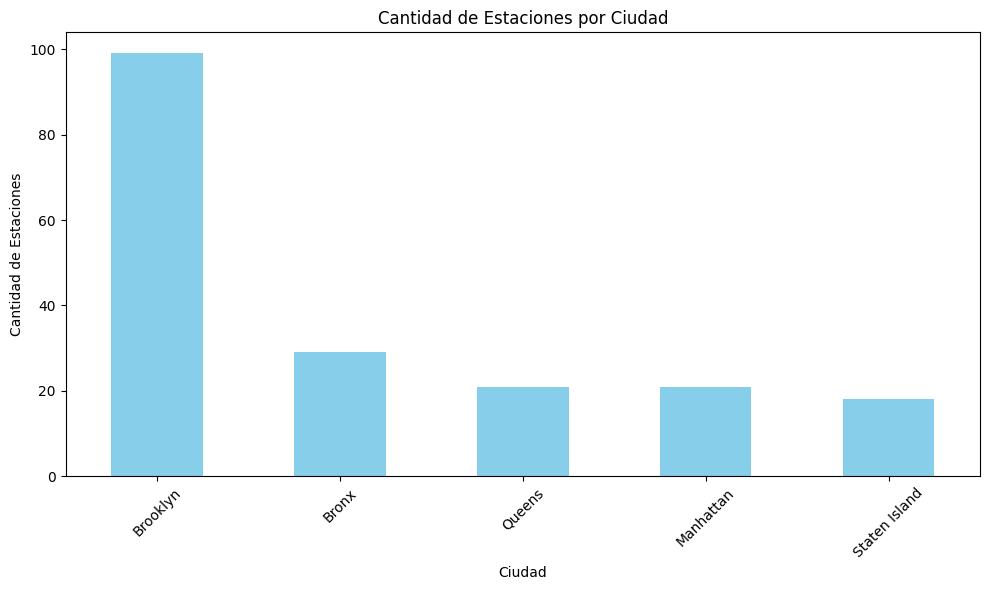

In [121]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_eafcs1.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Cantidad de Estaciones por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Estaciones')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()       # Ajustar diseño para que no se corten las etiquetas

plt.show()

Cantidad de estaciones por tipo de combustible

In [122]:
df_eafcs2 = df_eafcs['Fuel Type Code'].value_counts()
print(df_eafcs2)

Fuel Type Code
ELEC    175
CNG      10
E85       3
Name: count, dtype: int64


Gráfico de Estaciones por tipo de combustible

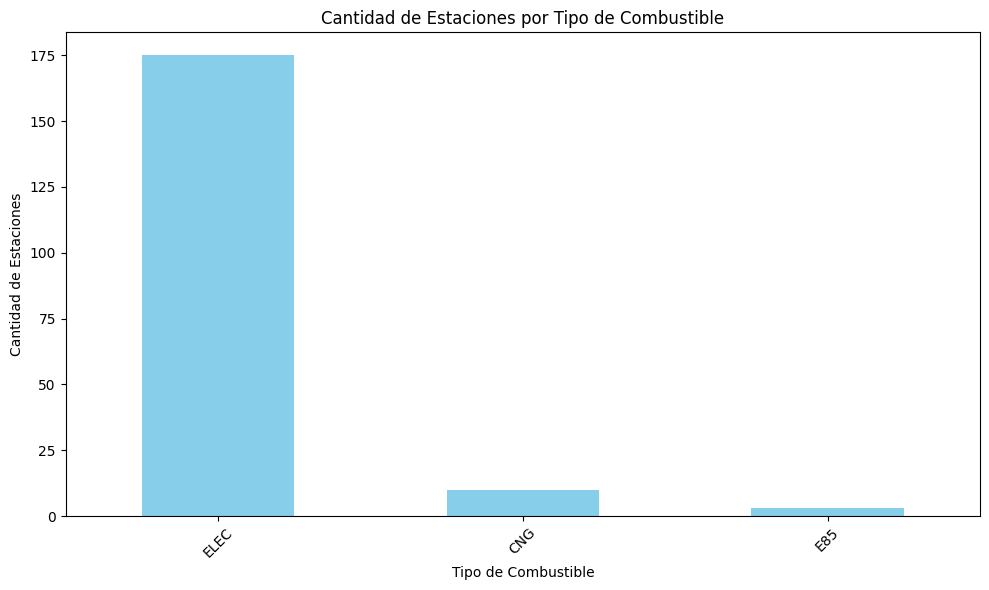

In [126]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_eafcs2.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Cantidad de Estaciones por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad de Estaciones')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()       # Ajustar diseño para que no se corten las etiquetas

plt.show()

Calculo de Estaciones por Ciudad y TIpo de Combustible

In [175]:
# Contar la cantidad de combinaciones únicas de 'City' y 'Fuel Type Code'
combination_counts = df_eafcs.groupby(['City', 'Fuel Type Code']).size().reset_index(name='Value')

# Crear una copia del dataframe
df_eafcs_clean = df_eafcs.copy()

# Unir estos conteos con el DataFrame original
df_eafcs_merged = df_eafcs_clean.merge(combination_counts, on=['City', 'Fuel Type Code'], suffixes=('', '_count'))

# Obtener dataframe sin duplicados
unique_entries = df_eafcs_merged[['City', 'Fuel Type Code', 'Value']].drop_duplicates().sort_values(by='City')

# Mostrar Dataframe
unique_entries

Unique Entries DataFrame:


,City,Fuel Type Code,Value
1,Bronx,CNG,6
8,Bronx,ELEC,23
0,Brooklyn,CNG,3
9,Brooklyn,ELEC,95
18,Brooklyn,E85,1
22,Manhattan,ELEC,21
2,Queens,CNG,1
11,Queens,E85,1
14,Queens,ELEC,19
12,Staten Island,ELEC,17


Gráfico de Estaciones por Tipo de Combustible y Ciudad

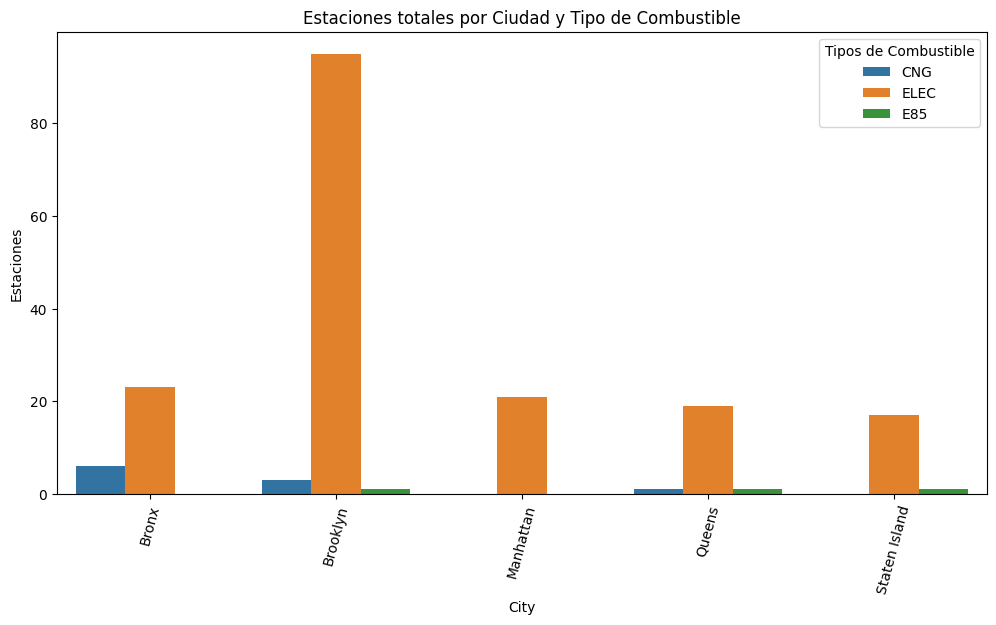

In [177]:
#Gráfico de barras Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=unique_entries,x='City', y='Value', hue='Fuel Type Code')
plt.xlabel('City')
plt.ylabel('Estaciones')
plt.title('Estaciones totales por Ciudad y Tipo de Combustible')
plt.xticks(rotation=75)
plt.legend(title='Tipos de Combustible');